# Análise de Dados Enem 2018
O objetivo dessa análise exploratória é verificar as notas de matemática e redação dos inscritos no enem de acordo com fatores sociais

### Base de dados:
http://portal.inep.gov.br/web/guest/microdados


In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import os
from IPython.display import Image

In [2]:
#Definindo diretórios 
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')
ANALISE_DIR = os.path.join(BASE_DIR, 'analise')

In [3]:
conda info --envs

# conda environments:
#
base                     C:\Users\rebec\anaconda3
programaria-env       *  C:\Users\rebec\anaconda3\envs\programaria-env


Note: you may need to restart the kernel to use updated packages.


In [4]:
#Como a planilha é muito grande, iremos selecionar somente essas colunas
colunas = ['NU_INSCRICAO','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA',
           'IN_GESTANTE','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002','Q006','Q025','Q027']

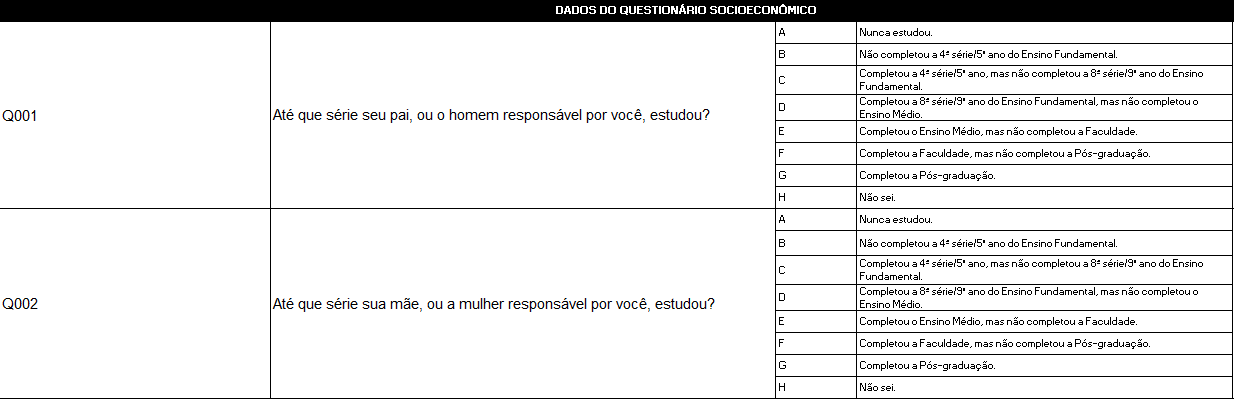

In [5]:
#Dicionario de dados 
Image(os.path.join(DATA_DIR,"dictdados1.png"))

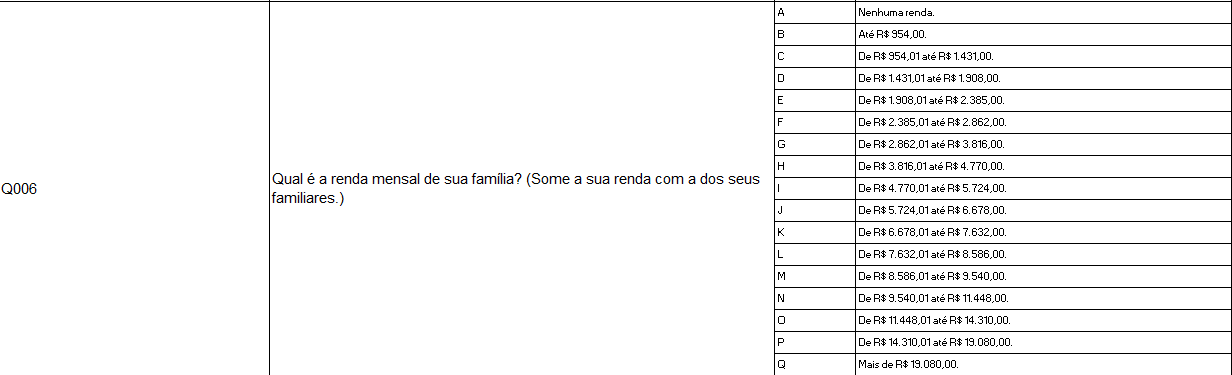

In [6]:
Image(os.path.join(DATA_DIR,"dictdados2.png"))

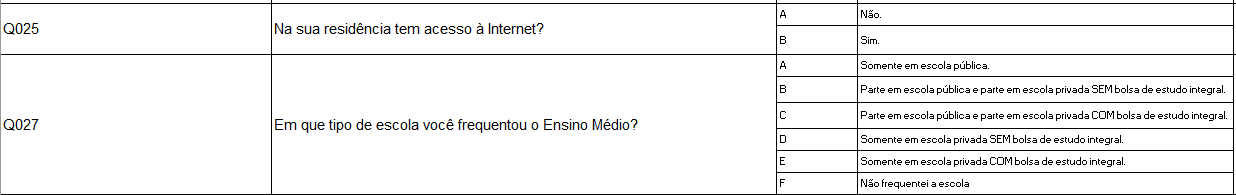

In [7]:
Image(os.path.join(DATA_DIR,"dictdados3.png"))

In [8]:
df = pd.read_csv(os.path.join(DATA_DIR, 'MICRODADOS_ENEM_2018.csv'), sep=';', encoding='ISO-8859-1', usecols=colunas)

In [9]:
df.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,IN_GESTANTE,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,Q027
0,180008202043,DF,44.0,M,1,0,NaN,NaN,A,A,A,A,A
1,180007197856,MA,23.0,F,3,0,480.3,280.0,B,B,B,A,A
2,180008517434,SP,23.0,F,1,0,NaN,NaN,E,E,C,B,A
3,180007661228,BA,26.0,F,3,0,NaN,NaN,B,C,B,B,A
4,180008787987,BA,20.0,M,0,0,NaN,360.0,C,E,B,B,A


### Limpeza dos dados

In [10]:
df.isna().sum()

NU_INSCRICAO              0
SG_UF_RESIDENCIA          0
NU_IDADE                 97
TP_SEXO                   0
TP_COR_RACA               0
IN_GESTANTE               0
NU_NOTA_MT          1608648
NU_NOTA_REDACAO     1365483
Q001                      0
Q002                      0
Q006                      0
Q025                      0
Q027                      0
dtype: int64

In [11]:
#Dropo meu dados NaN
df.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_IDADE'], axis=0, inplace=True)

In [12]:
df['NU_IDADE'] = df['NU_IDADE'].astype(int)

In [13]:
#Verifico duplicadas
df.duplicated().sum()

0

In [14]:
#Substituindo itens
raca_map = {0: 'ND', 1: 'Branco', 2: 'Preto', 3: 'Pardo', 4: 'Amarelo', 5: 'Indígena'}
#Applicando map das raças
df['TP_COR_RACA'] = [raca_map[i] for i in df['TP_COR_RACA']]

## Análise Geral

In [15]:
#Porcentagem de participantes por idade
perc_idade = (df['NU_IDADE'].value_counts()/len(df['NU_IDADE']))*100
perc_idade

17    19.348245
18    19.034916
19    11.597744
20     7.510753
16     6.980328
        ...    
87     0.000051
83     0.000051
84     0.000026
86     0.000026
90     0.000026
Name: NU_IDADE, Length: 79, dtype: float64

In [16]:
# Mais de 60% dos canditados tem entre 16 e 20 anos
soma = 0
for k, v in perc_idade.items():
    if k >= 16 and k <= 20:
        soma += v
print('%.2f%%' % soma)

64.47%


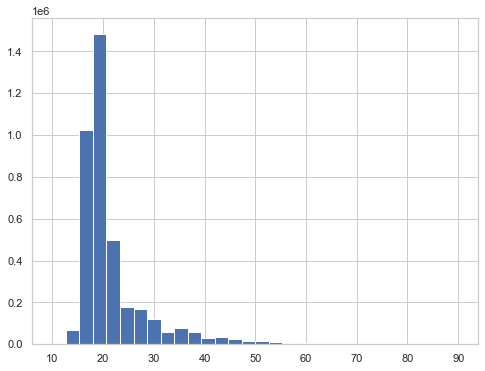

In [56]:
#Distribuição das idades
df['NU_IDADE'].hist(bins=30, figsize=(8,6));

In [18]:
#Porcentagem de participantes por UF
(df['SG_UF_RESIDENCIA'].value_counts()/len(df['NU_IDADE']))*100


SP    16.415974
MG    10.919746
BA     7.427772
RJ     6.787733
CE     5.954458
PE     5.498179
PA     5.382427
RS     4.304806
PR     4.218641
MA     4.167378
GO     3.431440
PB     2.926313
PI     2.377448
RN     2.336433
SC     2.254068
ES     2.052459
AM     1.970351
DF     1.882594
AL     1.709518
MT     1.629131
SE     1.426392
MS     1.234850
RO     1.093467
TO     0.978408
AP     0.701164
AC     0.683674
RR     0.235177
Name: SG_UF_RESIDENCIA, dtype: float64

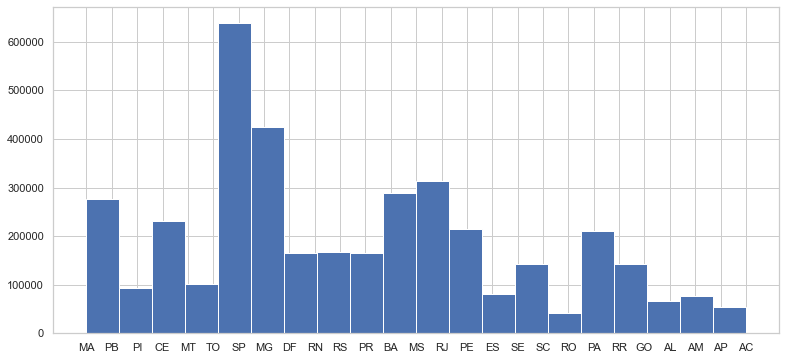

In [53]:
#Distribuição por UF
df['SG_UF_RESIDENCIA'].hist(bins=20, figsize=(13,6));

In [20]:
#Número de gestantes
coluna_sexo = df['TP_SEXO'].value_counts()
coluna_gestante = df['IN_GESTANTE'].value_counts()
perc_gestante=(coluna_gestante[1]/coluna_sexo[0])*100
perc_gestante

0.022203104089542382

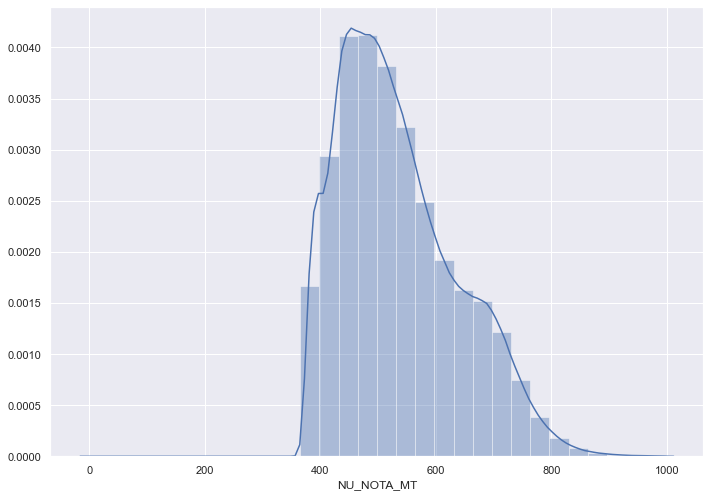

In [21]:
#Plotando a distribuição da váriavel target nota matemática
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['NU_NOTA_MT'], bins=30)
plt.show()

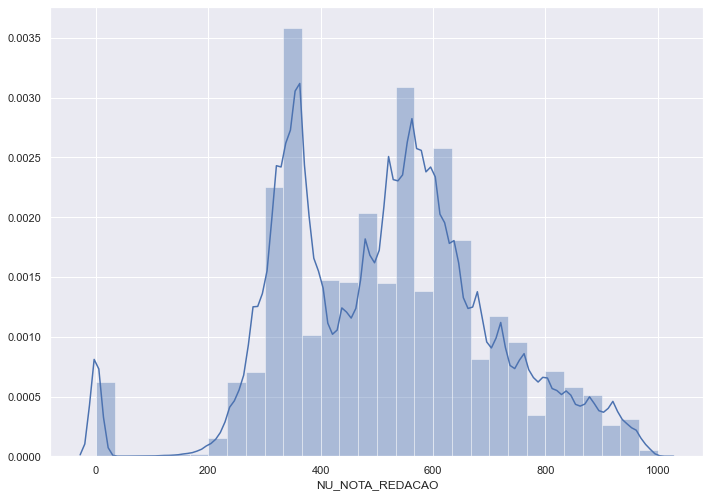

In [22]:
#Plotando a distribuição da váriavel target nota redação
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['NU_NOTA_REDACAO'], bins=30)
plt.show()

### Resumo da Análise Geral
<p> Mais de 60% dos canditados tem entre 16 e 20 anos </p>
<p> Os 5 estados com mais participantes foram São Paulo, Minas Gerais, Bahia, Rio de Janeiro e Ceará </p>
<p> Os 5 estados com menos participantes foram Roraima, Acre, Tocantins, AP e Rondônia </p>
<p> 0.02% mulheres eram gestantes</p>
<p> O histograma das notas de matática é assimétrico e nos informa que a maioria das notas encontra entre o intervalo de 400 e 600, com poucos outliers, com poucas notas menores que 400 e maiores que 800</p>
<p> O histograma das notas de redação é assimétrico e multimodal simples (as notas tem distibuição bem menos "proporcional" e com maior número de outliers)</p>

## Análise das notas por sexo

In [23]:
#Quantidade de pessoas por sexo
df['TP_SEXO'].value_counts()

F    2301480
M    1592191
Name: TP_SEXO, dtype: int64

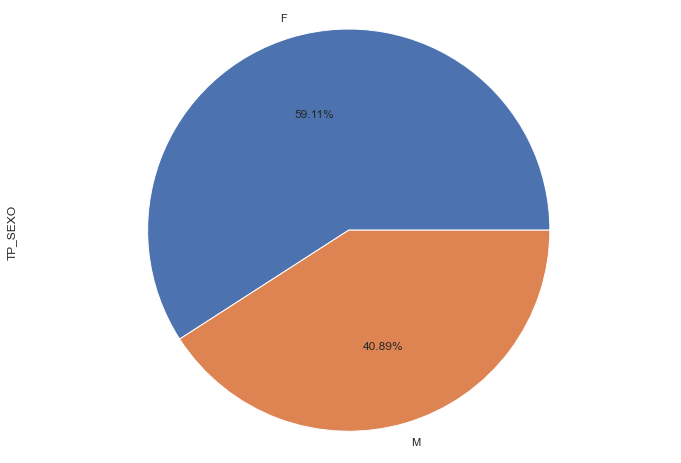

In [24]:
#Porcentagem de pessoas por sexo
df['TP_SEXO'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');  # Para deixar o gráfico redondo

In [25]:
#Notas máximas por sexo
df_sexo = df.filter(items=['TP_SEXO','NU_NOTA_REDACAO','NU_NOTA_MT'])
df_sexo.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO,NU_NOTA_MT
TP_SEXO,,
F,1000.0,996.1
M,1000.0,996.1


In [26]:
#Notas minimas maiores que 0 
#df_sexo.groupby('TP_SEXO').min()
df_sexo.query('NU_NOTA_MT > 0 and NU_NOTA_REDACAO > 0').groupby('TP_SEXO').min()


,NU_NOTA_REDACAO,NU_NOTA_MT
TP_SEXO,,
F,40.0,360.0
M,40.0,360.3


In [27]:
#Média das notas
df_sexo.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO,NU_NOTA_MT
TP_SEXO,,
F,519.694119,518.344219
M,510.802473,560.273457


In [28]:
#Mediana das notas
df_sexo.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO,NU_NOTA_MT
TP_SEXO,,
F,520.0,500.8
M,520.0,544.1


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

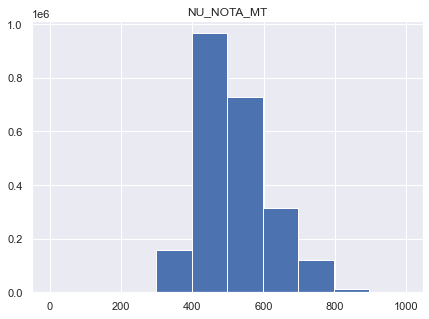

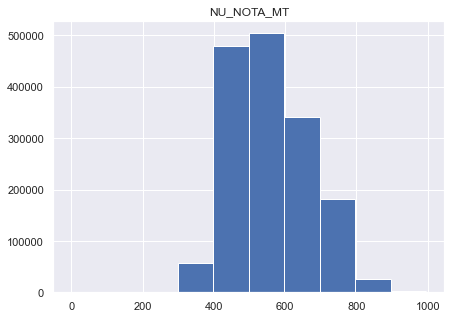

In [29]:
#Distribuição das notas de matemática 
df_sexo.filter(items=['TP_SEXO','NU_NOTA_MT']).groupby('TP_SEXO').hist(figsize=(7,5))

TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

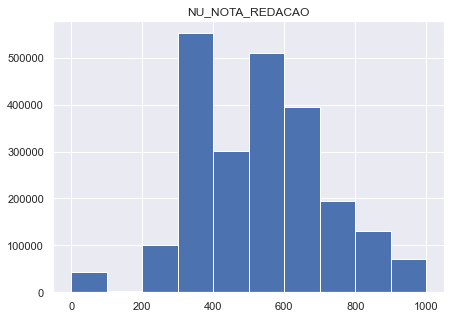

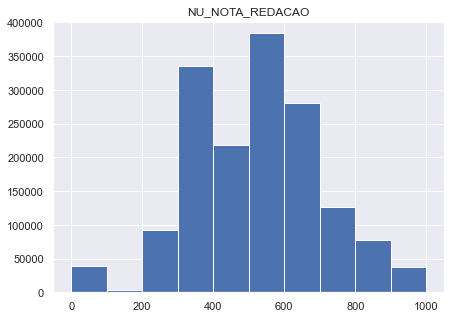

In [30]:
#Distribuição das notas de matemática 
df_sexo.filter(items=['TP_SEXO','NU_NOTA_REDACAO']).groupby('TP_SEXO').hist(figsize=(7,5))

### Análise por Raça

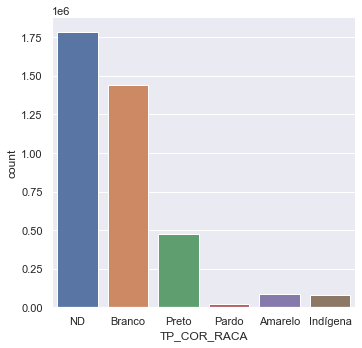

In [31]:
#Quantidade de pessoas por raça
#raca_map = {0: 'ND', 1: 'Branco', 2: 'Preto', 3: 'Pardo', 4: 'Amarelo', 5: 'Indígena'}
sns.catplot('TP_COR_RACA',data=df, kind='count').set_xticklabels(raca_map.values());

In [32]:
#Criando Df para análise
df_raca = df.filter(items=['TP_COR_RACA','NU_NOTA_REDACAO','NU_NOTA_MT'])

In [33]:
#Applicando map das raças
#df_raca['TP_COR_RACA'] = [raca_map[i] for i in df_raca['TP_COR_RACA']]

In [34]:
#Resumo das notas
df_raca.groupby('TP_COR_RACA').describe()

NU_NOTA_REDACAO                                                    \
                      count        mean         std  min    25%    50%    75%   
TP_COR_RACA                                                                     
Amarelo             87502.0  515.655642  182.955128  0.0  360.0  520.0  620.0   
Branco            1440784.0  552.253592  186.787335  0.0  400.0  560.0  680.0   
Indígena            22358.0  442.307004  177.305780  0.0  340.0  440.0  560.0   
ND                  77970.0  528.389637  194.400457  0.0  380.0  540.0  640.0   
Pardo             1787679.0  495.069182  179.972511  0.0  360.0  500.0  600.0   
Preto              477378.0  486.929142  173.622996  0.0  360.0  500.0  600.0   

                    NU_NOTA_MT                                             \
                max      count        mean         std  min    25%    50%   
TP_COR_RACA                                                                 
Amarelo       980.0    87502.0  539.638832  108.294162  0.0  456.3  517.8   
Branco       1000.0  1440784.0  562.303235  110.809447  0.0  473.7  545.8   
Indígena      980.0    22358.0  496.953319   82.950507  0.0  435.4  481.8   
ND            980.0    77970.0  551.370189  112.064120  0.0  462.4  530.4   
Pardo        1000.0  1787679.0  519.983585   94.578705  0.0  447.9  503.1   
Preto        1000.0   477378.0  511.081942   88.647702  0.0  443.5  496.3   

                             
                 75%    max  
TP_COR_RACA                  
Amarelo      605.875  996.1  
Branco       646.300  996.1  
Indígena     542.500  993.0  
ND           632.000  996.1  
Pardo        575.600  996.1  
Preto        563.600  988.9

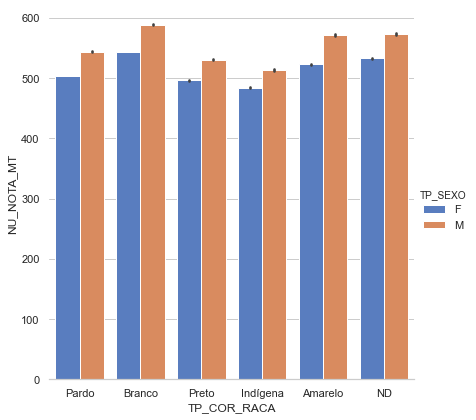

In [35]:
#Notas por Raça e Gênero

sns.set(style="whitegrid")

#Carrego campos que preciso
df_raca_sexo_matematica = df.filter(items=['TP_COR_RACA','NU_NOTA_MT','TP_SEXO']) 

#Faço as agragações
g = sns.catplot(x="TP_COR_RACA", y="NU_NOTA_MT", hue="TP_SEXO", data=df_raca_sexo_matematica,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("NU_NOTA_MT");

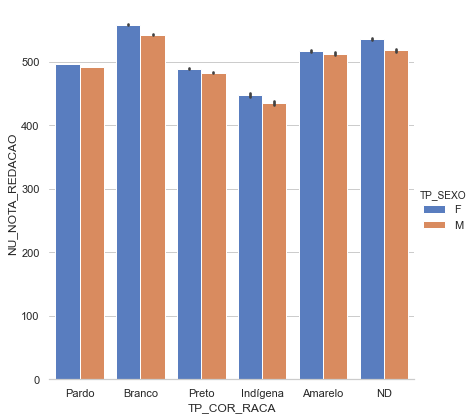

In [36]:
#Carrego campos que preciso
df_raca_sexo_redacao = df.filter(items=['TP_COR_RACA','NU_NOTA_REDACAO','TP_SEXO']) 

#Faço as agragações
g = sns.catplot(x="TP_COR_RACA", y="NU_NOTA_REDACAO", hue="TP_SEXO", data=df_raca_sexo_redacao,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("NU_NOTA_REDACAO");


In [37]:
#Média por Pretos e Brancos
df_raca.query('TP_COR_RACA == "Preto" or TP_COR_RACA == "Branco"').groupby('TP_COR_RACA').mean()

,NU_NOTA_REDACAO,NU_NOTA_MT
TP_COR_RACA,,
Branco,552.253592,562.303235
Preto,486.929142,511.081942


In [38]:
#Mediana por Pretos e Brancos
df_raca.query('TP_COR_RACA == "Preto" or TP_COR_RACA == "Branco"').groupby('TP_COR_RACA').median()

,NU_NOTA_REDACAO,NU_NOTA_MT
TP_COR_RACA,,
Branco,560.0,545.8
Preto,500.0,496.3


TP_COR_RACA
Branco    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Preto     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

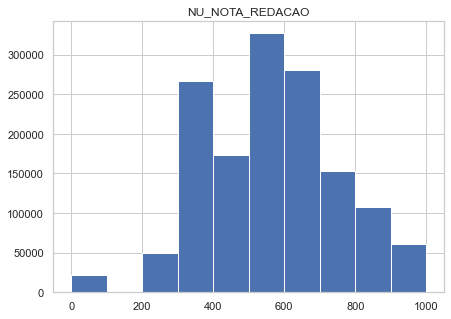

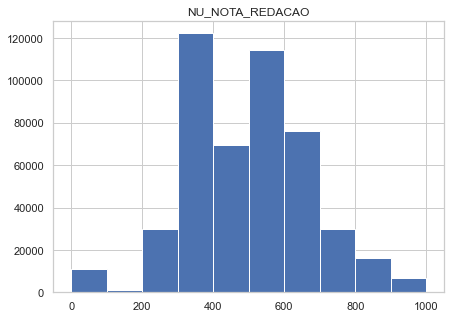

In [39]:
#Distribuição das notas de redação por Brancos e Pretos
df_raca_redacao = df_raca.filter(items=['TP_COR_RACA','NU_NOTA_REDACAO'])
df_raca_redacao.query('TP_COR_RACA == "Preto" or TP_COR_RACA == "Branco"').groupby('TP_COR_RACA').hist(figsize=(7,5))

TP_COR_RACA
Branco    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Preto     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

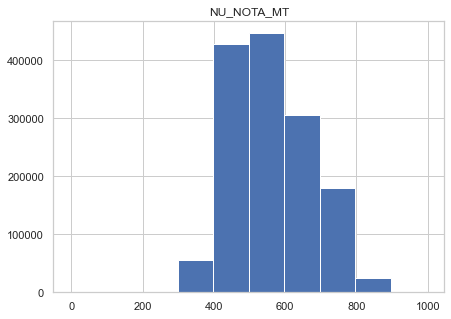

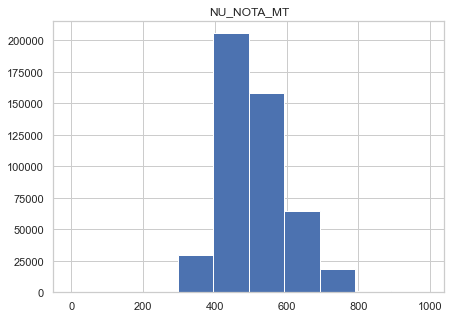

In [40]:
#Distribuição das notas de matematica por Brancos e Pretos
df_raca_redacao = df_raca.filter(items=['TP_COR_RACA','NU_NOTA_MT'])
df_raca_redacao.query('TP_COR_RACA == "Preto" or TP_COR_RACA == "Branco"').groupby('TP_COR_RACA').hist(figsize=(7,5))

## Análise Grau de Instrução dos responsáveis

In [41]:
#Mapa para q001 e q002
map_instr = {'A':'Nunca estudou',
'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E':'Completou o Ensino Médio, mas não completou a Faculdade',
'F':'Completou a Faculdade, mas não completou a Pós-graduação',
'G':'Completou a Pós-graduação',
'H':'Não sei'}

In [42]:
df_qtdd_incr = df.filter(items=['Q001','Q002','NU_INSCRICAO'])
df_qtdd_incr['Q001'] = [map_instr[i] for i in df['Q001']]
df_qtdd_incr['Q002'] = [map_instr[i] for i in df['Q002']]

### Quantidade de inscritos por grau de escolaridade dos pais

In [43]:
df_qtdd_incr.filter(['Q001','NU_INSCRICAO']).groupby(['Q001']).count().sort_values(by='NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",1043454
Não completou a 4ª série/5º ano do Ensino Fundamental,813665
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",549957
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",460444
Não sei,325645
"Completou a Faculdade, mas não completou a Pós-graduação",311907
Nunca estudou,200900
Completou a Pós-graduação,187699


### Quantidade de inscritos por grau de escolaridade das mães

In [44]:
df_qtdd_incr.filter(['Q002','NU_INSCRICAO']).groupby(['Q002']).count().sort_values(by='NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",1275050
Não completou a 4ª série/5º ano do Ensino Fundamental,606697
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515976
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",509533
"Completou a Faculdade, mas não completou a Pós-graduação",417214
Completou a Pós-graduação,322686
Nunca estudou,136414
Não sei,110101


### Média nas notas pelo grau de escolaridade dos pais

In [45]:
#Criando DF para análise
df_instr_pai = df.filter(items=['Q001','NU_NOTA_REDACAO','NU_NOTA_MT'])

In [46]:
df_instr_pai['Q001'] = [map_instr[i] for i in df['Q001']]

In [47]:
#Média
df_instr_pai.groupby('Q001').mean().sort_values(by=['NU_NOTA_REDACAO', 'NU_NOTA_MT'], ascending = False).round(1)

,NU_NOTA_REDACAO,NU_NOTA_MT
Q001,,
Completou a Pós-graduação,652.2,628.9
"Completou a Faculdade, mas não completou a Pós-graduação",622.4,606.9
"Completou o Ensino Médio, mas não completou a Faculdade",544.3,550.9
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",511.7,530.5
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.8,519.5
Não sei,474.3,512.7
Não completou a 4ª série/5º ano do Ensino Fundamental,464.5,502.4
Nunca estudou,427.3,483.4


### Média nas notas pelo grau de escolaridade das mães

In [48]:
#Criando DF para análise
df_instr_mae = df.filter(items=['Q002','NU_NOTA_REDACAO','NU_NOTA_MT'])

In [49]:
df_instr_mae['Q002'] = [map_instr[i] for i in df['Q002']]

In [50]:
df_instr_mae.groupby('Q002').mean().sort_values(by=['NU_NOTA_REDACAO', 'NU_NOTA_MT'], ascending = False).round(1)

,NU_NOTA_REDACAO,NU_NOTA_MT
Q002,,
Completou a Pós-graduação,622.8,604.6
"Completou a Faculdade, mas não completou a Pós-graduação",601.2,591.4
"Completou o Ensino Médio, mas não completou a Faculdade",530.0,542.0
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",496.0,521.3
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",479.7,512.0
Não completou a 4ª série/5º ano do Ensino Fundamental,454.6,497.0
Não sei,447.2,504.1
Nunca estudou,414.2,478.2


## Análise por Renda

## Análise por Acesso a Internet

## Análise por tipo de escola no Ensino Média